## Lab 5: Decision Tree

Tiatnic Survival Dataset

In [1]:
#Import the Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#Look at top values of train data 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Print the column names of train data
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Check the data type of each column
train.info()
#train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#Print the dimension of train and test data
train.shape , test.shape

((891, 12), (418, 11))

In [7]:
#Print summary statistics of train data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Print the number of missing values in each column of train and test data
train.isna().sum() , test.isna().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

## Data Visualization

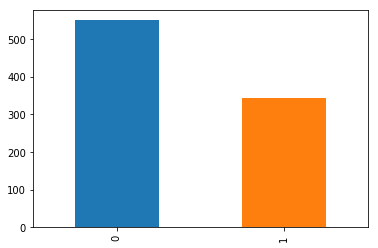

In [48]:
#Barchart of Survived, Pclass, Sex, Embarked
train['Survived'].value_counts().plot(kind = 'bar')

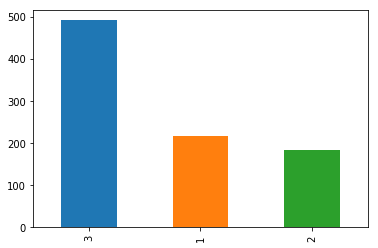

In [10]:
train['Pclass'].value_counts().plot(kind = 'bar')

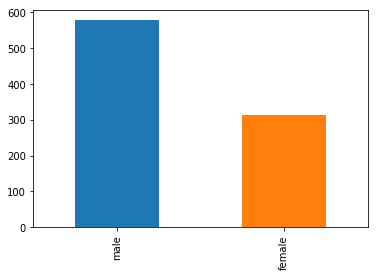

In [11]:
train['Sex'].value_counts().plot(kind = 'bar')

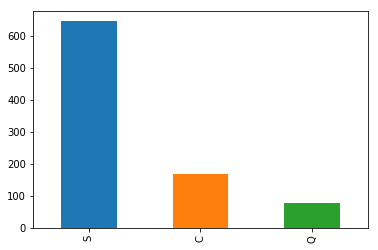

In [52]:
train['Embarked'].value_counts().plot(kind = 'bar')

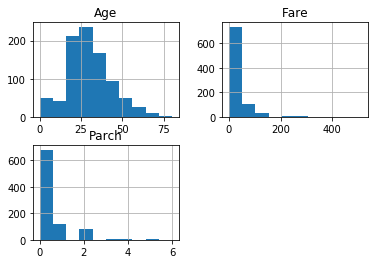

In [50]:
#Histogram of Age, Parch, Fare
train.hist(['Age','Parch','Fare'])
plt.show()

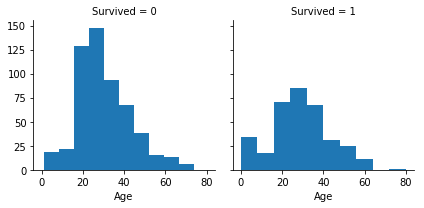

In [65]:
#Plot histogram of age for survived and did not survived class
sns.FacetGrid(train, col='Survived').map(plt.hist, 'Age')
plt.show()

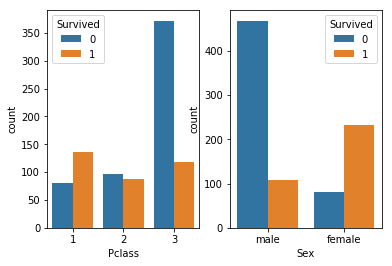

In [15]:
#Count class and geder wise survival rate - plot with appropriate chart
plt.figure(1)
plt.subplot(121) 
sns.countplot(x="Pclass", hue="Survived",data=train)
plt.subplot(122)
sns.countplot(x="Sex", hue="Survived",data=train)


## Handling Missing Values

In [16]:
#Replace the msiing values in Embarked column by 'S'
train['Embarked'].fillna("S",inplace = True)

In [17]:
#Impute the missing values in Fare column with median value
train['Fare'].fillna(np.median(train['Fare']),inplace = True)

In [18]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
age_avg = train['Age'].mean()
age_std = train['Age'].std()
age_null_count = train['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
train.loc[np.isnan(train['Age']), 'Age'] = age_null_random_list
train['Age'] = train['Age'].astype(int)

## Feature Engineering - Creating new features

In [19]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
train['FamilySize'] = train['Parch'] + train['SibSp'] +1

In [20]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
train['IsAlone'] = np.where(train['FamilySize']== 1,'True','False')

In [66]:
#Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True
#train['Has_cabin'] = np.where(train['Cabin'].isna(),'False','True')
train['Has_cabin'] = train['Cabin'].isna()

KeyError: 'Cabin'

In [22]:
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
train.drop(columns = ['PassengerId','Name','SibSp','Ticket','Cabin'],inplace = True)

In [23]:
train

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,0,3,male,22,0,7.2500,S,2,False,True
1,1,1,female,38,0,71.2833,C,2,False,False
2,1,3,female,26,0,7.9250,S,1,True,True
3,1,1,female,35,0,53.1000,S,2,False,False
4,0,3,male,35,0,8.0500,S,1,True,True
5,0,3,male,17,0,8.4583,Q,1,True,True
6,0,1,male,54,0,51.8625,S,1,True,False
7,0,3,male,2,1,21.0750,S,5,False,True
8,1,3,female,27,2,11.1333,S,3,False,True
9,1,2,female,14,0,30.0708,C,2,False,True


## Check the preprocessed data

In [24]:
#Print the top five elemnets
train.head(5)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,0,3,male,22,0,7.2500,S,2,False,True
1,1,1,female,38,0,71.2833,C,2,False,False
2,1,3,female,26,0,7.9250,S,1,True,True
3,1,1,female,35,0,53.1000,S,2,False,False
4,0,3,male,35,0,8.0500,S,1,True,True


In [25]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Has_cabin     0
dtype: int64

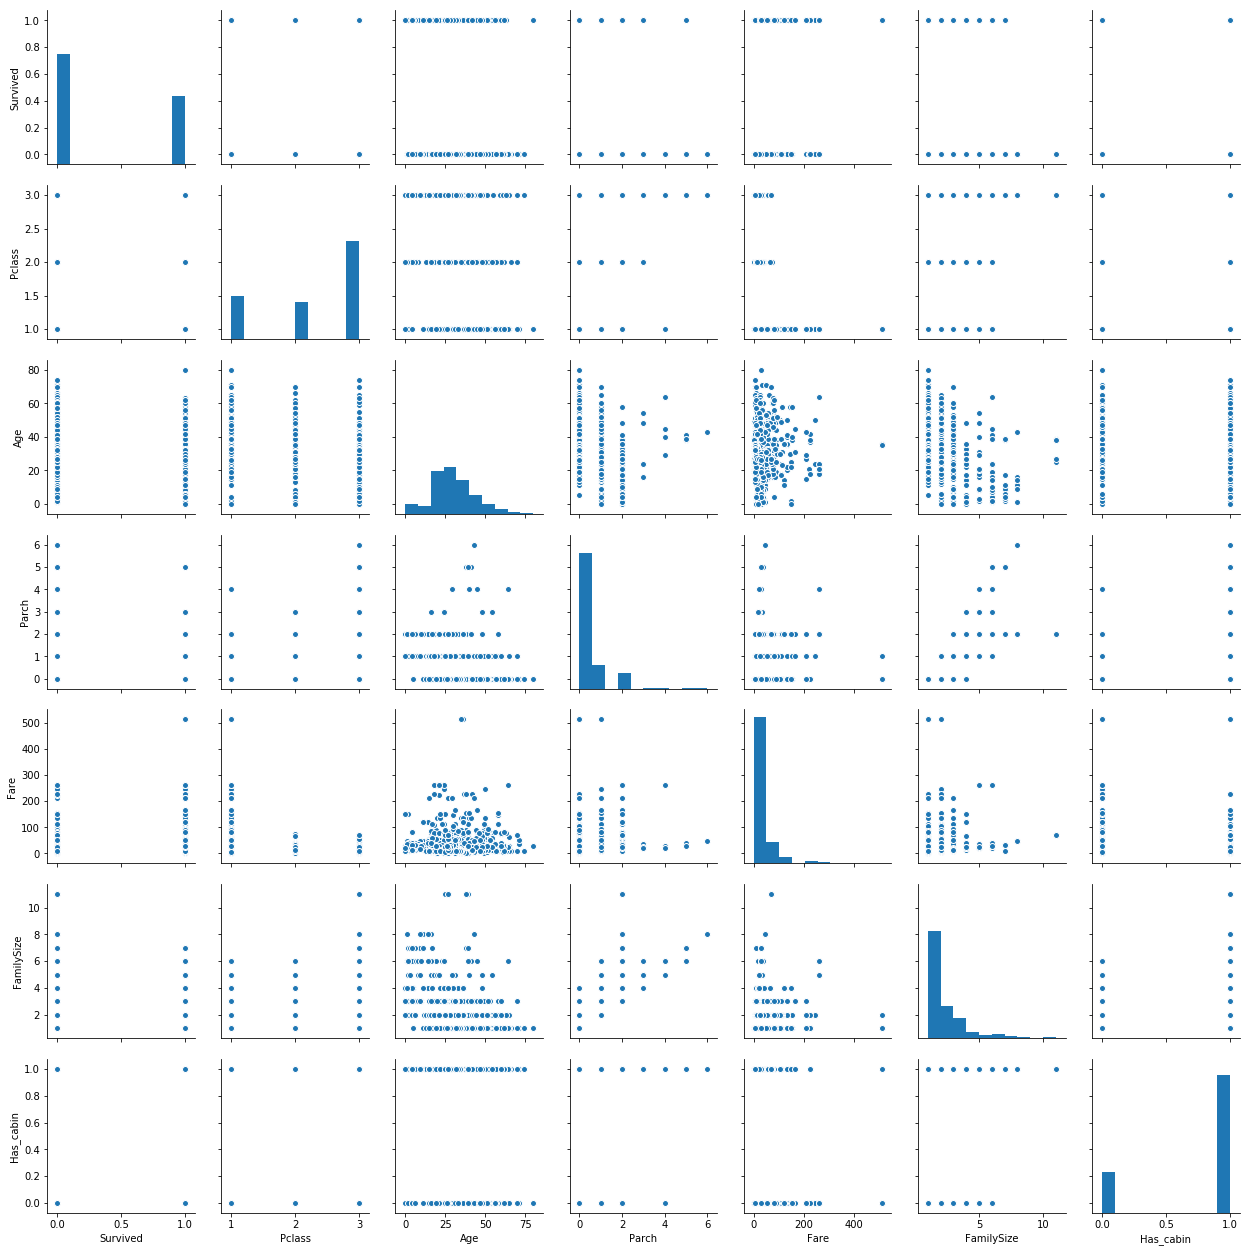

In [26]:
#Do a pairplot of all features

sns.pairplot(train)

## Model Building

In [27]:
#Prepare X and y
X= train.drop('Survived',axis = 1)
y= train['Survived']

In [28]:
df_categorical = X.select_dtypes(include=['object','bool'])
df_categorical

,Sex,Embarked,IsAlone,Has_cabin
0,male,S,False,True
1,female,C,False,False
2,female,S,True,True
3,female,S,False,False
4,male,S,True,True
5,male,Q,True,True
6,male,S,True,False
7,male,S,False,True
8,female,S,False,True
9,female,C,False,True


In [29]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
X = X.drop(df_categorical.columns, axis=1)
X = pd.concat([X, df_categorical], axis=1)
X.head()

,Pclass,Age,Parch,Fare,FamilySize,Sex,Embarked,IsAlone,Has_cabin
0,3,22,0,7.2500,2,1,2,0,1
1,1,38,0,71.2833,2,0,0,0,0
2,3,26,0,7.9250,1,0,2,1,1
3,1,35,0,53.1000,2,0,2,0,0
4,3,35,0,8.0500,1,1,2,1,1


In [30]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_validation = train_test_split(X,y,test_size = 0.1 , random_state = 0)

C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
# Create the model
# Fitting the decision tree with default hyperparameters
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

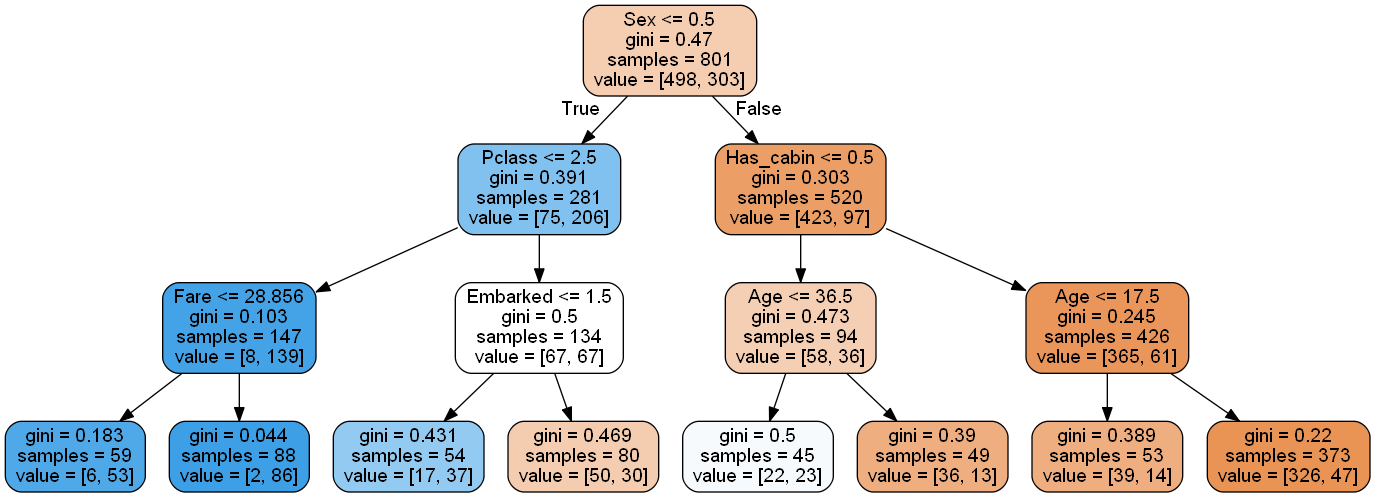

In [67]:
#Print the tree
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
features = list(X.columns[0:])
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<img src="tree2.png">

In [34]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_validation, y_pred_default))

# Printing confusion matrix and accuracy
print(confusion_matrix(y_validation,y_pred_default))
print(accuracy_score(y_validation,y_pred_default))

             precision    recall  f1-score   support

          0       0.79      0.90      0.84        51
          1       0.84      0.69      0.76        39

avg / total       0.82      0.81      0.81        90

[[46  5]
 [12 27]]
0.8111111111111111


# Find a better model

In [35]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 0)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [36]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  war

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000000,0.000000,0.000000,0.00000,1,{'max_depth': 1},0.776398,0.757764,0.788820,0.786164,...,0.785268,0.019447,11,0.787500,0.792188,0.784375,0.785047,0.777259,0.785274,0.004855
1,0.003125,0.006251,0.000000,0.00000,2,{'max_depth': 2},0.776398,0.757764,0.788820,0.742138,...,0.765293,0.016047,16,0.787500,0.803125,0.784375,0.806854,0.799065,0.796184,0.008777
2,0.000000,0.000000,0.003125,0.00625,3,{'max_depth': 3},0.795031,0.801242,0.801242,0.811321,...,0.813983,0.024282,1,0.828125,0.834375,0.826562,0.825545,0.822430,0.827408,0.003950
3,0.003125,0.006250,0.000000,0.00000,4,{'max_depth': 4},0.795031,0.801242,0.801242,0.754717,...,0.799001,0.027833,4,0.832812,0.834375,0.828125,0.842679,0.836449,0.834888,0.004763
4,0.009376,0.007655,0.000000,0.00000,5,{'max_depth': 5},0.801242,0.801242,0.826087,0.748428,...,0.792759,0.025513,6,0.857812,0.846875,0.848437,0.861371,0.845794,0.852058,0.006309


C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


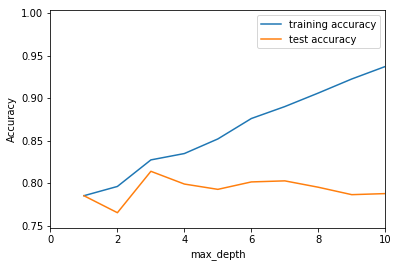

In [37]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.xlim(xmin=0,xmax=10)
plt.show()


In [38]:
# GridSearchCV to find optimal min_sample_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [39]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  war

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009376,0.007655,0.000000,0.00000,5,{'min_samples_leaf': 5},0.795031,0.770186,0.850932,0.742138,...,0.789014,0.035873,2,0.876563,0.890625,0.879687,0.886293,0.876947,0.882023,0.005536
1,0.003125,0.006249,0.000000,0.00000,25,{'min_samples_leaf': 25},0.788820,0.788820,0.757764,0.779874,...,0.781523,0.012614,7,0.818750,0.821875,0.814063,0.825545,0.817757,0.819598,0.003881
2,0.012501,0.006251,0.000000,0.00000,45,{'min_samples_leaf': 45},0.788820,0.807453,0.832298,0.786164,...,0.806492,0.017418,1,0.807813,0.803125,0.804688,0.816199,0.800623,0.806489,0.005385
3,0.003125,0.006250,0.003125,0.00625,65,{'min_samples_leaf': 65},0.776398,0.757764,0.788820,0.754717,...,0.766542,0.013794,8,0.787500,0.792188,0.784375,0.792835,0.792835,0.789946,0.003427
4,0.003130,0.006260,0.000000,0.00000,85,{'min_samples_leaf': 85},0.776398,0.757764,0.788820,0.754717,...,0.766542,0.013794,8,0.787500,0.792188,0.784375,0.792835,0.792835,0.789946,0.003427


C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


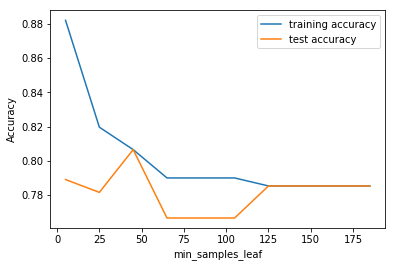

In [40]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [41]:
#GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, )}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 200)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  war

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003123,0.006246,0.000000,0.000000,5,{'min_samples_split': 5},0.801242,0.751553,0.813665,0.729560,...,0.766542,0.034525,194,0.954688,0.940625,0.951562,0.945483,0.945483,0.947568,0.004971
1,0.003126,0.006253,0.000000,0.000000,6,{'min_samples_split': 6},0.788820,0.745342,0.813665,0.748428,...,0.766542,0.029809,194,0.942187,0.935937,0.940625,0.939252,0.940810,0.939762,0.002127
2,0.003125,0.006249,0.000000,0.000000,7,{'min_samples_split': 7},0.782609,0.757764,0.832298,0.748428,...,0.775281,0.030871,104,0.932813,0.928125,0.928125,0.920561,0.929907,0.927906,0.004053
3,0.003126,0.006252,0.000000,0.000000,8,{'min_samples_split': 8},0.788820,0.751553,0.844720,0.761006,...,0.780275,0.034909,102,0.921875,0.921875,0.918750,0.917445,0.922118,0.920413,0.001937
4,0.000000,0.000000,0.003125,0.006251,9,{'min_samples_split': 9},0.788820,0.745342,0.832298,0.767296,...,0.777778,0.030997,103,0.912500,0.914062,0.910937,0.911215,0.922118,0.914167,0.004127


C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


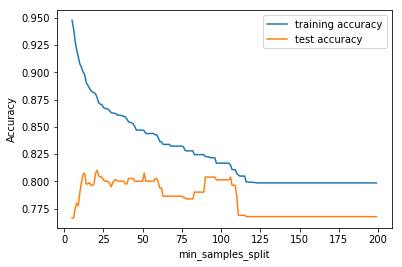

In [43]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
# Create a model with optimal hyperparameters - max_depth, min_samples_leaf, min_samples_split
#Decide the optimal values by looking at the previous plottings
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(max_depth = 3,min_samples_leaf = 45,min_samples_split = 15)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=45, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
#Checking all parameters at once and giving them to GridSearchCV Classifiers at once....
parameters = {'min_samples_split': range(5, 200, 20),
             'criterion':['gini','entropy'],
              'min_samples_leaf': range(2, 200, 20),
              'max_depth': range(1,9)
             }
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
gscv = GridSearchCV(dt,parameters, cv=n_folds, 
                   scoring="accuracy")
gscv.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = gscv.predict(X_test)

In [ ]:
gscv.best_params_, gscv.best_score_

In [ ]:
#Print the otimal Model
features = list(X.columns[0:])
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<img src="tree3.png">

In [ ]:
# Let's check the evaluation metrics of our optimal model
# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_validation, y_pred_default))

# Printing confusion matrix and accuracy
print(confusion_matrix(y_validation,y_pred_default))
print(accuracy_score(y_validation,y_pred_default))

In [ ]:
#Test the perfromance of the optimal model on Test Data
test = pd.read_csv('test.csv')

In [ ]:
test.isna().sum()

In [ ]:
#Impute the missing values in Fare column with median value
test['Fare'].fillna(np.median(train['Fare']),inplace = True)

In [ ]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
age_avg = test['Age'].mean()
age_std = test['Age'].std()
age_null_count = test['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
test.loc[np.isnan(test['Age']), 'Age'] = age_null_random_list
test['Age'] = test['Age'].astype(int)

In [ ]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
test['FamilySize'] = test['Parch'] + test['SibSp'] +1

In [ ]:
#Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True
#train['Has_cabin'] = np.where(train['Cabin'].isna(),'False','True')
test['Has_cabin'] = test['Cabin'].isna()
test['IsAlone'] = np.where(test['FamilySize']== 1,'True','False')

In [ ]:
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
test.drop(columns = ['PassengerId','Name','SibSp','Ticket','Cabin'],inplace = True)

In [ ]:
#Prepare X and y
X1= test
y1 = pd.read_csv('gender_submission.csv')
y1=y1['Survived']

In [ ]:
X1.shape , y1.shape

In [ ]:
#encoding 
df_categorical = X1.select_dtypes(include=['object','bool'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
X1 = X1.drop(df_categorical.columns, axis=1)
X1 = pd.concat([X1, df_categorical], axis=1)
X1.head()

In [ ]:
# Let's check the evaluation metrics of our optimal model
# Making predictions
y_pred_default = dt_default.predict(X1)
# Printing classification report
print(classification_report(y1, y_pred_default))

# Printing confusion matrix and accuracy
print(confusion_matrix(y1,y_pred_default))
print(accuracy_score(y1,y_pred_default))

## End